<a href="https://colab.research.google.com/github/Malek-Ghorbel/ranking-semantics-Abstract-Argumentation/blob/main/3_Burden_based_semantic(Bbs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-Import librairies:

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# **2-Create the graph**

In [2]:
def create_graph(nodes, edges):
  G = nx.DiGraph()
  G.add_nodes_from(nodes)
  G.add_edges_from(edges)
  return G

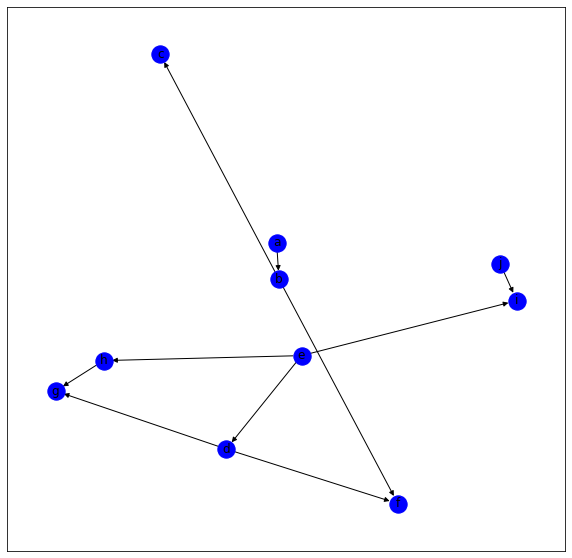

In [4]:
nodes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
edges = [('a', 'b'), ('b' , 'c'), ('b', 'f'), ('d', 'f'), ('d', 'g'), ('e', 'h'), ('e', 'd'), ('e', 'i'),  ('j', 'i'), ('h', 'g')]
G = create_graph(nodes, edges)
plt.figure(figsize =(10, 10))
nx.draw_networkx(G, with_labels = True, node_color ='blue')

# 3-Implement the function:

In [9]:
def burden_based(G, threshold) :
    node_to_index = {node: index for index, node in enumerate(G.nodes())}
    predecessors = {node_to_index[node]: [node_to_index[pred] for pred in G.predecessors(node)] for node in G.nodes()}
    num_nodes = G.number_of_nodes()
    nodes = list(G.nodes())
    steps = [1] * num_nodes
    matrix = [steps]

    for i in range(1, threshold+1):
        new_steps = [0] * num_nodes
        for j in range(num_nodes):
            if not predecessors[j]:
                new_steps[j] = 1
            else:
                total_sum = sum(1 / steps[pred_index] for pred_index in predecessors[j])
                new_steps[j] = 1 + total_sum

        matrix.append(new_steps)
        steps = new_steps

        if steps == matrix[-2]:
            break
    burden_vectors = list(zip(*matrix))
    #print(burden_vectors)
    nodes_bv = list(zip(nodes ,  burden_vectors ))
    sorted_nodes = [x[0] for x in sorted(nodes_bv, key=lambda x: x[1:])]
    return sorted_nodes

# 3-Call the function

In [10]:
burden_based(G,10)

['a', 'e', 'j', 'c', 'b', 'd', 'h', 'f', 'g', 'i']